# Regression Testing

In [128]:
# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

## Review of sf DataFrame

In [129]:
sf = pd.read_csv('../data_files/sf_clean.csv')

In [130]:
# Reformatting hood_district names
sf['hood_district'] = sf['hood_district'].astype(int)
sf['hood_district'] = sf['hood_district'].astype(str)

In [4]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          989 non-null    int64  
 1   sqft           989 non-null    float64
 2   beds           989 non-null    float64
 3   bath           989 non-null    float64
 4   laundry        989 non-null    object 
 5   pets           989 non-null    object 
 6   housing_type   989 non-null    object 
 7   parking        989 non-null    object 
 8   hood_district  989 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 69.7+ KB


In [5]:
sf.head()

,price,sqft,beds,bath,laundry,pets,housing_type,parking,hood_district
0,6800,1600.0,2.0,2.0,(a) in-unit,(d) no pets,(c) multi,(b) protected,7
1,3500,550.0,1.0,1.0,(a) in-unit,(a) both,(c) multi,(b) protected,7
2,5100,1300.0,2.0,1.0,(a) in-unit,(a) both,(c) multi,(d) no parking,7
3,9000,3500.0,3.0,2.5,(a) in-unit,(d) no pets,(c) multi,(b) protected,7
4,3100,561.0,1.0,1.0,(c) no laundry,(a) both,(c) multi,(d) no parking,7


In [6]:
sf.describe()

,price,sqft,beds,bath
count,989.000000,989.000000,989.000000,989.000000
mean,3595.035389,976.765420,1.679474,1.390293
std,1546.222670,474.629798,1.076710,0.562714
min,750.000000,150.000000,0.000000,1.000000
25%,2650.000000,650.000000,1.000000,1.000000
50%,3300.000000,900.000000,2.000000,1.000000
75%,4242.000000,1200.000000,2.000000,2.000000
max,19000.000000,3500.000000,6.000000,4.000000


In [7]:
sf.corr()

,price,sqft,beds,bath
price,1.000000,0.835834,0.673328,0.691190
sqft,0.835834,1.000000,0.765070,0.720929
beds,0.673328,0.765070,1.000000,0.629331
bath,0.691190,0.720929,0.629331,1.000000


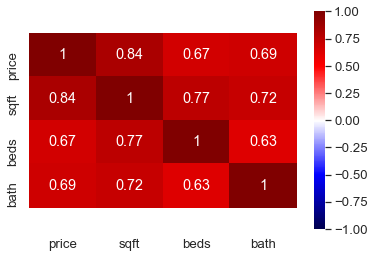

In [8]:
# example of a better corr matrix
sns.heatmap(sf.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

plt.gca().set_ylim(len(sf.corr())+0.5, -0.5);  # quick fix to make sure viz isn't cut off


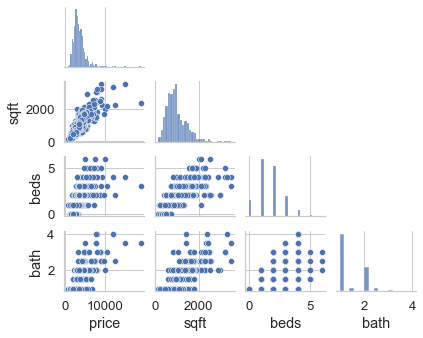

In [9]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(sf, height=1.2, aspect=1.25, corner=True);

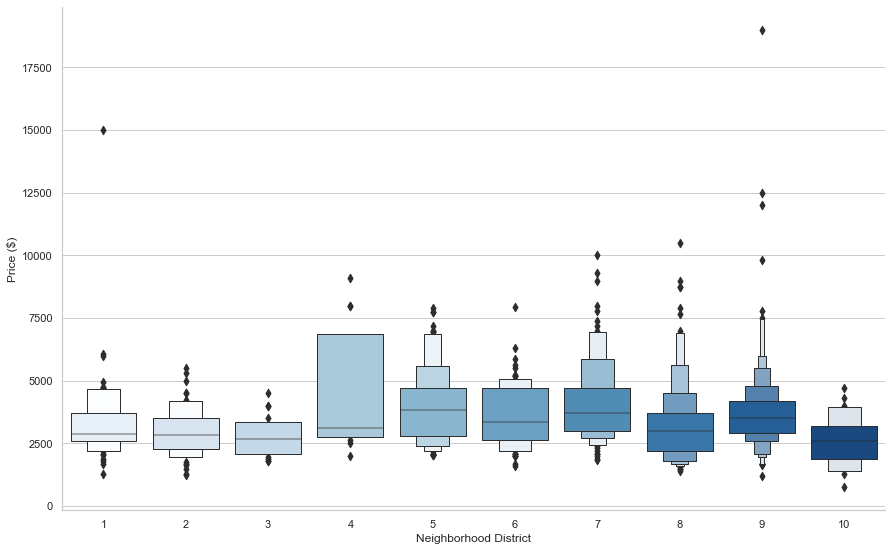

In [131]:
# Neighborhood & Price
order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']


sns.set_theme(style="whitegrid")

catplot = sns.catplot(x='hood_district', y='price', data=sf, order=order, kind='boxen', palette='Blues');
catplot.set(xlabel='Neighborhood District', ylabel='Price ($)')
catplot.fig.set_figwidth(14)
catplot.fig.set_figheight(8)
#catplot.fig.suptitle('Apartment Rental Prices by Neighborhood', fontsize=18, fontname='Arial')
#plt.savefig('../img/hood_catplot.png');

In [46]:
sf.laundry.unique()

array(['(a) in-unit', '(c) no laundry', '(b) on-site'], dtype=object)

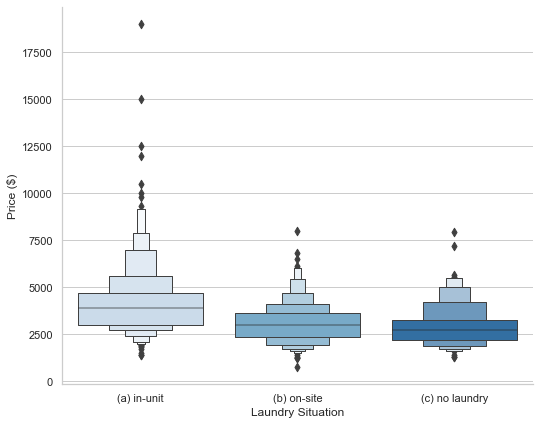

In [95]:
# Laundry & Price
sns.set_theme(style="whitegrid")
catplot = sns.catplot(x='laundry', y='price', data=sf, kind='boxen', order=['(a) in-unit', '(b) on-site', '(c) no laundry'], palette='Blues')
catplot.set(xlabel='Laundry Situation', ylabel='Price ($)')
catplot.fig.set_figwidth(8)
catplot.fig.set_figheight(6)
#plt.savefig('../img/laundry_catplot.png');

In [49]:
sf.pets.unique()

array(['(d) no pets', '(a) both', '(c) cats', '(b) dogs'], dtype=object)

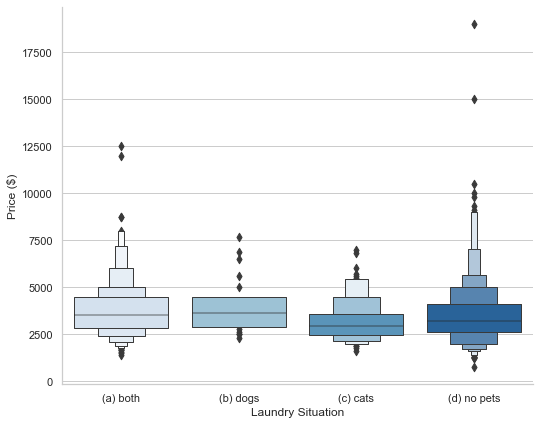

In [92]:
# Pets & Price
catplot = sns.catplot(x='pets', y='price', data=sf, kind='boxen', order=['(a) both', '(b) dogs', '(c) cats', '(d) no pets'], palette='Blues')
catplot.set(xlabel='Laundry Situation', ylabel='Price ($)')
catplot.fig.set_figwidth(8)
catplot.fig.set_figheight(6);

In [51]:
sf.parking.unique()

array(['(b) protected', '(d) no parking', '(a) valet', '(c) off-street'],
      dtype=object)

In [56]:
sf.parking.value_counts()

(d) no parking    478
(b) protected     439
(c) off-street     38
(a) valet          34
Name: parking, dtype: int64

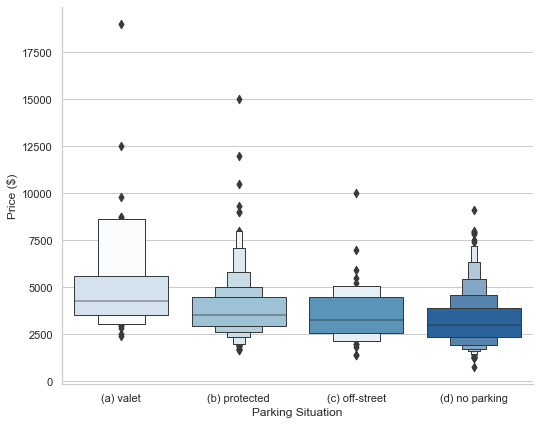

In [97]:
# Parking & Price
catplot = sns.catplot(x='parking', y='price', data=sf, kind='boxen', order=['(a) valet', '(b) protected', '(c) off-street', '(d) no parking'], palette='Blues')
catplot.set(xlabel='Parking Situation', ylabel='Price ($)')
catplot.fig.set_figwidth(8)
catplot.fig.set_figheight(6)
#plt.savefig('../img/parking_catplot.png');

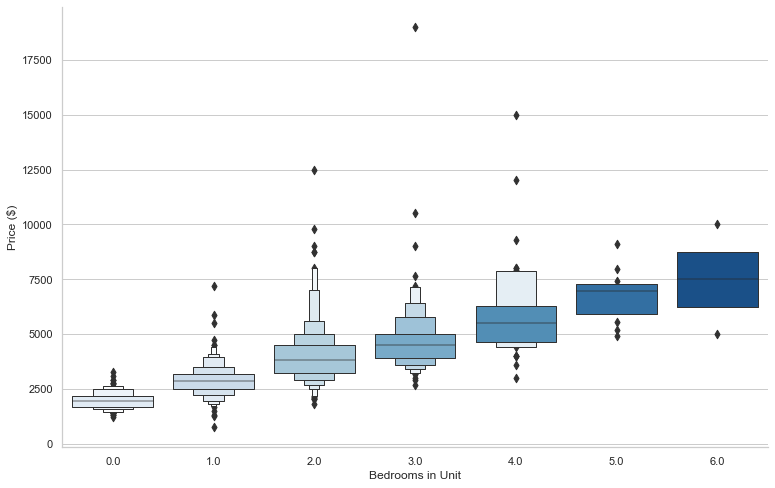

In [134]:
# Parking & Price
catplot = sns.catplot(x='beds', y='price', data=sf, kind='boxen', palette='Blues')
catplot.set(xlabel='Bedrooms in Unit', ylabel='Price ($)')
catplot.fig.set_figwidth(12)
catplot.fig.set_figheight(7)
#plt.savefig('../img/bed_catplot.png');

In [53]:
sf.housing_type.unique()

array(['(c) multi', '(a) single', '(b) double'], dtype=object)

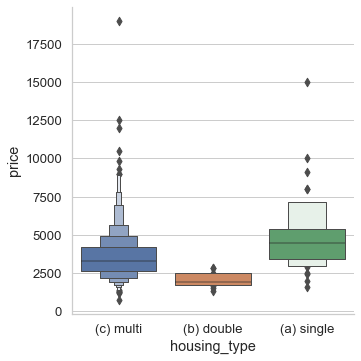

In [54]:
# Housing Type
sns.catplot(x='housing_type', y='price', data=sf, kind='boxen', order=['(c) multi', '(b) double', '(a) single']);

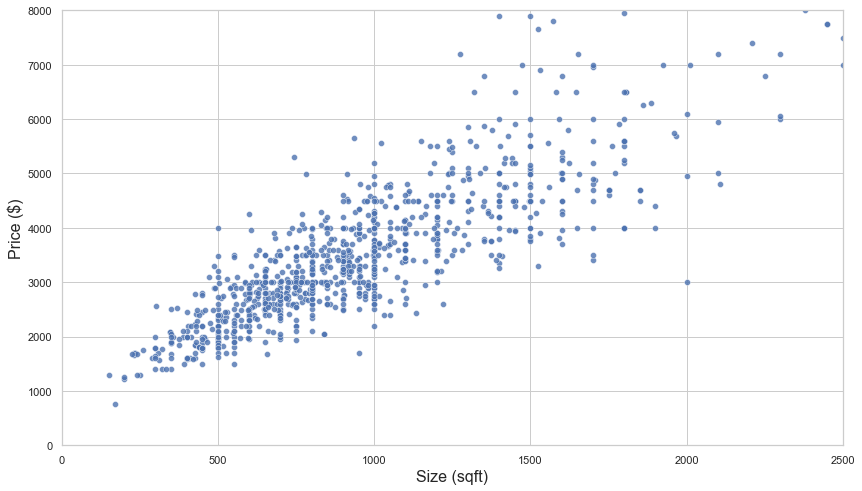

In [127]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=sf.sqft, y=sf.price, data=sf, alpha=.8)


plt.xlim(0, 2500)
plt.ylim(0, 8000)

#plt.title('Unit Size (sqft) and Price', fontsize=20, fontname='Arial')
plt.xlabel('Size (sqft)', fontsize=16, fontname='Arial')
plt.ylabel('Price ($)', fontsize=16, fontname='Arial')
#plt.savefig('../img/size_price.png');

Text(0, 0.5, 'Price ($)')

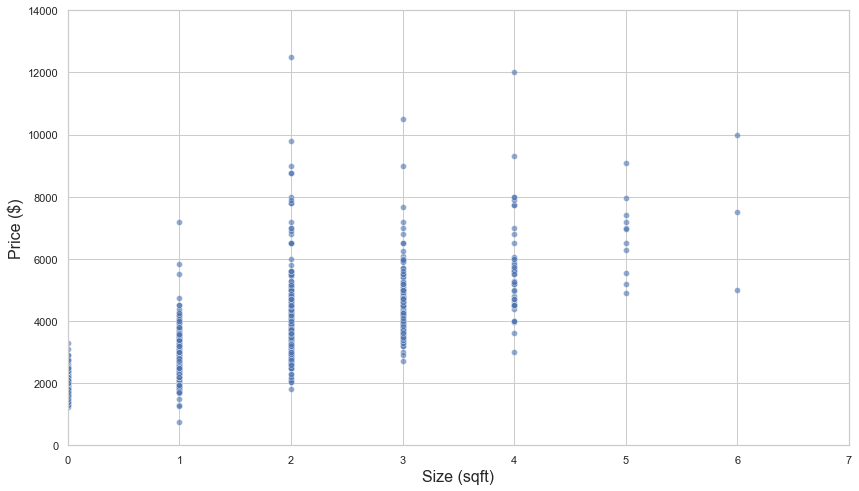

In [119]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=sf.beds, y=sf.price, data=sf, alpha=.6)


plt.xlim(0, 7)
plt.ylim(0, 14000)

#plt.title('Unit Size (sqft) and Price', fontsize=20, fontname='Arial')
plt.xlabel('Size (sqft)', fontsize=16, fontname='Arial')
plt.ylabel('Price ($)', fontsize=16, fontname='Arial')
#plt.savefig('../img/size_price.png');

### Regression with sklearn

#### Single independent variable

In [15]:
#Create an empty model
lr = LinearRegression()

# Choose just the X1 column for our data
# If using just ONE feature, we should apply `.values.reshape(-1, 1)`
X = sf['sqft'].values.reshape(-1, 1)

# Choose the response variable
y = sf['price']

# Fit the model 
lr.fit(X, y)

LinearRegression()

In [16]:
lr.score(X,y)

0.6986176510656257

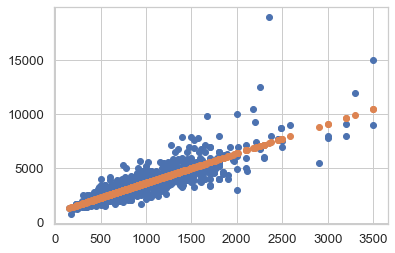

In [17]:
plt.scatter(X, y);
plt.scatter(X, lr.predict(X));

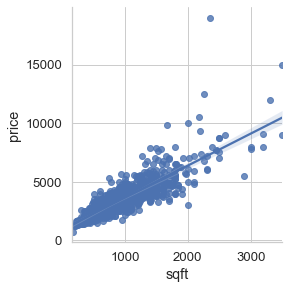

In [18]:
sns.lmplot(x='sqft', y='price', data=sf, height=4);

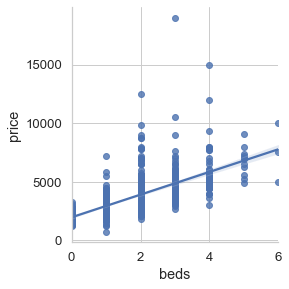

In [19]:
sns.lmplot(x='beds', y='price', data=sf, height=4);

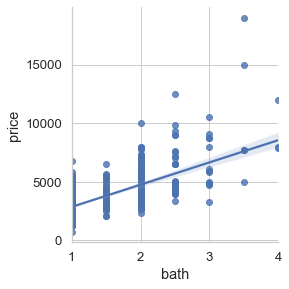

In [20]:
sns.lmplot(x='bath', y='price', data=sf, height=4);

#### Multiple independent variables

In [21]:
#sf.head(3)

In [22]:
model = LinearRegression()

# Construct the data matrix, X, using X1 and X3 as features
# Hint: now that you have more than one feature, you can work with dataframes 
X = sf[['sqft', 'beds', 'bath']]

# Choose the response variable
y = sf['price']

# Fit the model 
model.fit(X, y)

# Score the model (with R^2)
model.score(X, y)

0.7159141709042369

In [23]:
# print out intercept
print("Intercept: ", model.intercept_)

# print out other coefficients
print("Coefficients: ", model.coef_)

Intercept:  666.8587955481671
Coefficients:  [  2.18711602  69.67558797 485.40763346]


### constants

In [24]:
#Create the model
model = sm.OLS(y, sm.add_constant(X)) 

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     827.4
Date:                Tue, 06 Oct 2020   Prob (F-statistic):          1.41e-268
Time:                        13:31:35   Log-Likelihood:                -8043.3
No. Observations:                 989   AIC:                         1.609e+04
Df Residuals:                     985   BIC:                         1.611e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        666.8588     71.135      9.375      0.000     527.265     806.452
sqft           2.1871      0.098     22.353      0.000       1.995       2.379
beds          69.6756     38.462      1.812      0.070      -5.800     145.152
bath         485.4076     68.383      7.098      0.000     351.214     619.601
==============================================================================
Omnibus:                      836.353   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64804.091
Skew:                           3.360   Prob(JB):                         0.00
Kurtosis:                      42.082   Cond. No.                     3.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

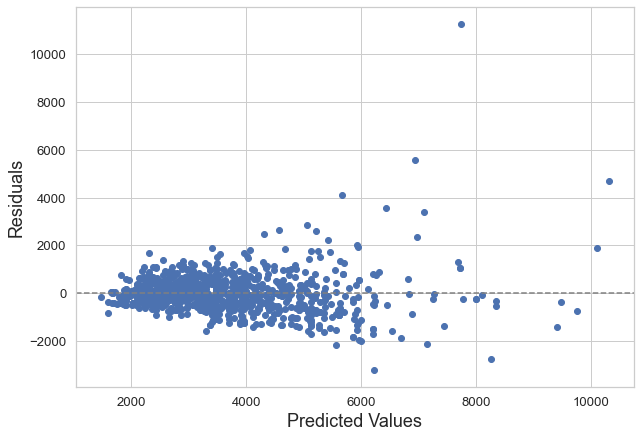

In [25]:
# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(10, 7))
plt.scatter(fit.predict(), fit.resid)    #change this if working with sklearn

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

## Using Dummy Variables

In [26]:
sf.head(3)

,price,sqft,beds,bath,laundry,pets,housing_type,parking,hood_district
0,6800,1600.0,2.0,2.0,(a) in-unit,(d) no pets,(c) multi,(b) protected,7
1,3500,550.0,1.0,1.0,(a) in-unit,(a) both,(c) multi,(b) protected,7
2,5100,1300.0,2.0,1.0,(a) in-unit,(a) both,(c) multi,(d) no parking,7


In [27]:
sf_dummy = pd.get_dummies(sf)

In [28]:
sf_dummy.head()

,price,sqft,beds,bath,laundry_(a) in-unit,laundry_(b) on-site,laundry_(c) no laundry,pets_(a) both,pets_(b) dogs,pets_(c) cats,...,hood_district_1,hood_district_10,hood_district_2,hood_district_3,hood_district_4,hood_district_5,hood_district_6,hood_district_7,hood_district_8,hood_district_9
0,6800,1600.0,2.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3500,550.0,1.0,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,5100,1300.0,2.0,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,9000,3500.0,3.0,2.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3100,561.0,1.0,1.0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler

X, y = sf_dummy.drop('price',axis=1), sf_dummy['price']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=37)

### Ridge

In [31]:
#set up the 2 models we're choosing from:

lin = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

rid = Ridge(alpha=140)

In [32]:
#validate

lin.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lin.score(X_val, y_val):.3f}')

rid.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {rid.score(X_val_scaled, y_val):.3f}')

Linear Regression val R^2: 0.806
Ridge Regression val R^2: 0.822


### Ridge Residuals

In [33]:
rid_prediction = rid.predict(X_val_scaled)
rid_residual = (y_val - rid_prediction)

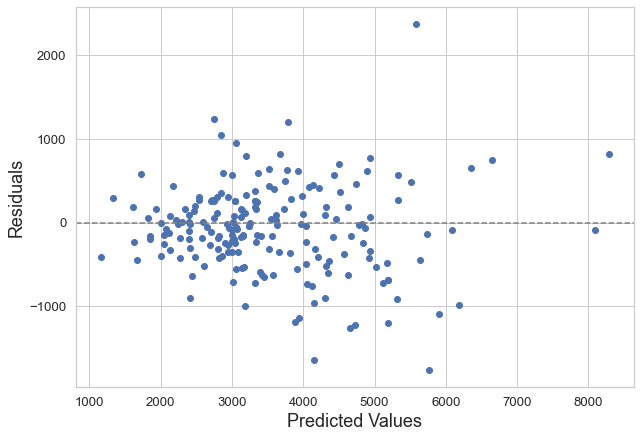

In [34]:
# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(10, 7))
plt.scatter(rid_prediction, rid_residual)    #change this if working with sklearn

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

## Lasso

In [35]:
X, y = sf_dummy.drop('price',axis=1), sf_dummy['price']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [36]:
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=37)

In [37]:
las = Lasso()
las.fit(X_test, y_test)
print(las.score(X,y), las.score(X_test, y_test))

0.6876996821695955 0.8292035341971393


In [38]:
lin_coefs = lin.coef_
rid_coefs = rid.coef_
las_coefs = las.coef_

features = sf_dummy.columns[1:]

coef_data = {'Features': features,
             'Linear': lin_coefs,
             'Ridge': rid_coefs,
             'Lasso': las_coefs}

coef_df = pd.DataFrame(coef_data)
coef_df

,Features,Linear,Ridge,Lasso
0,sqft,1.855602,591.067528,2.545908
1,beds,200.350836,289.585106,-112.962868
2,bath,368.812883,272.464299,544.255536
3,laundry_(a) in-unit,221.577061,106.498097,129.407464
4,laundry_(b) on-site,-88.037860,-64.595140,-94.611216
5,laundry_(c) no laundry,-133.539201,-61.385061,0.000000
6,pets_(a) both,-116.699455,-21.444883,-93.778101
7,pets_(b) dogs,177.680014,21.718539,219.079133
8,pets_(c) cats,-23.851903,9.106615,101.915983
9,pets_(d) no pets,-37.128656,9.750663,-28.331506


In [39]:
from IPython.display import Image
Image("img/SFAR_map.png", width=900, height=800)

FileNotFoundError: No such file or directory: 'img/SFAR_map.png'

FileNotFoundError: No such file or directory: 'img/SFAR_map.png'

<IPython.core.display.Image object>

In [40]:
sf.hood_district.value_counts()

9     332
8     207
7     123
5     106
6      62
2      51
1      50
10     33
3      14
4      11
Name: hood_district, dtype: int64

In [41]:
sf.hood_district.value_counts(normalize=True).cumsum()

9     0.335693
8     0.544995
7     0.669363
5     0.776542
6     0.839232
2     0.890799
1     0.941355
10    0.974722
3     0.988878
4     1.000000
Name: hood_district, dtype: float64

In [42]:
# Feature Engineering
# --> Bed/Bath ratio?
# --> SQFT/BR ratio?

### Lasso residuals

In [43]:
las = Lasso()
las.fit(X_test, y_test)
print(las.score(X,y), las.score(X_test, y_test))

0.6876996821695955 0.8292035341971393


In [44]:
las_prediction = las.predict(X_test)
las_residual = (y_test - las_prediction)

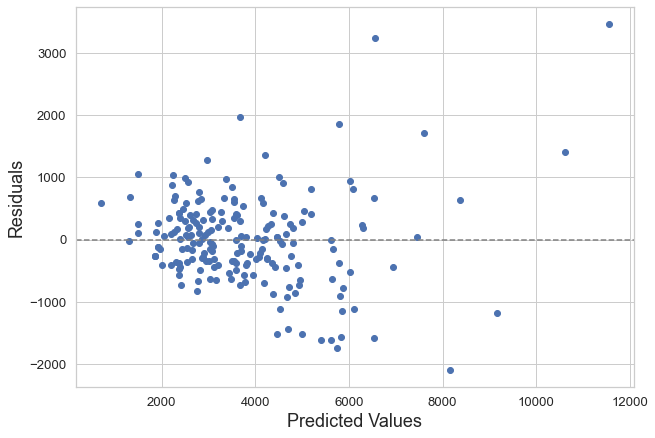

In [45]:
# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(10, 7))
plt.scatter(las_prediction, las_residual)    #change this if working with sklearn

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);